# Modul 6 Struktur Data: *Stack* dan urusan notasi *prefix*, *infix*, *postfix*

Kembali ke [Struktur Data (dengan Python)](strukdat2023.qmd)

Di praktikum kali ini tentang *stack*, kita akan membahas implementasi *stack* (baik dengan *array* maupun dengan *linked list*) serta contoh penggunaannya. Selain itu, kita akan membahas tentang penggunaan *stack* ketika berurusan dengan notasi *prefix*, *infix*, dan *postfix*.

In [3]:
import numpy as np
import graphviz as gv

## Implementasi dan contoh penggunaan *stack*

### Implementasi *stack* dengan *array*

In [7]:
class ArrayStack:
    def __init__(self, dtype, max):
        self.dtype = dtype
        self.max = max
        self.array = np.empty(max, dtype=dtype)
        self.top = -1
    
    def get_size(self):
        return self.top + 1
    
    def get_capacity(self):
        return self.max
    
    def get_dtype(self):
        return self.dtype

    def is_empty(self):
        if self.get_size() > 0:
            return False
        else:
            return True
    
    def is_full(self):
        if self.get_size() >= self.get_capacity():
            # if top+1 >= max
            # atau sama saja, if top >= max-1
            return True
        else:
            return False

    def push(self, newdata):
        if self.is_full():
            print("Error push: stack sudah penuh.")
        else:
            self.top += 1
            self.array[self.top] = newdata
    
    def peek(self):
        if self.is_empty():
            print("Error peek: stack sedang kosong.")
            return None
        else:
            return self.array[self.top]
    
    def pop(self):
        if self.is_empty():
            print("Error pop: stack sudah kosong sebelumnya.")
            return None
        else:
            output = self.array[self.top]
            self.top -= 1
            return output

    def print_stack(self):
        i = self.top
        while i >= 0:
            print(self.array[i])
            i -= 1

    # print array
    def print_storage(self):
        print(self.array)
    
    def get_digraph_stack(self):
        new_digraph = gv.Digraph()
        # gambar akan terdiri dari satu tabel saja, satu kolom,
        # dan tiap baris adalah tiap elemen di stack

        tabel_besar = "<"
        # pembuka tabel
        tabel_besar += "<TABLE BORDER=\"0\" CELLBORDER=\"1\" CELLSPACING=\"0\">"
        # menambahkan tiap elemen sebagai baris tersendiri
        i = self.top
        if i < 0:
            tabel_besar += "<TR><TD>"
            tabel_besar += "(Stack sedang kosong; tidak ada data sama sekali.)"
            tabel_besar += "</TD></TR>"
        while i >= 0:
            tabel_besar += "<TR><TD>"
            tabel_besar += str(self.array[i])
            tabel_besar += "</TD></TR>"
            i -= 1
        # penutup tabel
        tabel_besar += "</TABLE>"
        tabel_besar += ">"
        new_digraph.node("ArrayStack", shape="none", label=tabel_besar)
        return new_digraph

    def get_digraph_storage(self):
        # menggambar array
        new_digraph = gv.Digraph()

        # pembuka tabel
        tabel_besar = "<"
        tabel_besar += "<TABLE BORDER=\"0\" CELLBORDER=\"1\" CELLSPACING=\"0\">"
        # tabel hanya terdiri dari satu baris
        tabel_besar += "<TR>"
        # satu elemen per kolom
        for i in range(self.get_capacity()):
            tabel_besar += "<TD>"
            tabel_besar += str(self.array[i])
            tabel_besar += "</TD>"
        # penutup baris
        tabel_besar += "</TR>"
        # penutup tabel
        tabel_besar += "</TABLE>"
        tabel_besar += ">"
        new_digraph.node("array", shape="none", label=tabel_besar)
        return new_digraph

In [31]:
arraystack = ArrayStack(int, 5)
arraystack.push(5)
arraystack.push(80)
arraystack.push(100)

In [32]:
arraystack.print_stack()

100
80
5


In [33]:
print(arraystack.get_capacity())

5


In [34]:
arraystack.print_storage()

[                  5                  80                 100
 4622241330054037504 4625478292286210048]


In [35]:
print(arraystack.peek())

100


In [36]:
arraystack.print_stack()

100
80
5


In [37]:
nilai = arraystack.pop()
print(nilai)

100


In [38]:
arraystack.print_stack()

80
5


In [39]:
arraystack.print_storage()

[                  5                  80                 100
 4622241330054037504 4625478292286210048]


In [40]:
arraystack.push(-10)
arraystack.push(57)

In [41]:
arraystack.print_stack()

57
-10
80
5


In [42]:
arraystack.print_storage()

[                  5                  80                 -10
                  57 4625478292286210048]


In [43]:
graf1 = arraystack.get_digraph_stack()

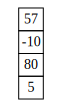

In [44]:
display(graf1)

In [45]:
graf2 = arraystack.get_digraph_storage()

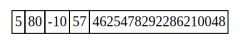

In [46]:
display(graf2)

In [47]:
arraystack.push(90)

In [48]:
arraystack.push(46)

Error push: stack sudah penuh.


In [49]:
arraystack.print_storage()

[  5  80 -10  57  90]


In [50]:
print(arraystack.pop())
print(arraystack.pop())
print(arraystack.pop())
print(arraystack.pop())
print(arraystack.pop())

90
57
-10
80
5


In [51]:
print(arraystack.pop())

Error pop: stack sudah kosong sebelumnya.
None


In [52]:
print(arraystack.get_size())

0


In [53]:
arraystack.print_stack()

In [54]:
arraystack.print_storage()

[  5  80 -10  57  90]


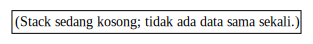

In [55]:
display(arraystack.get_digraph_stack())

### Implementasi *stack* dengan *singly-inked list*

In [56]:
class SLNode:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next

In [65]:
class SLStack:
    def __init__(self):
        # "head" ganti nama jadi top
        self.top = None
    
    def is_empty(self):
        if self.top == None:
            return True
        else:
            return False
    
    def push(self, newdata):
        newnode = SLNode(newdata)
        newnode.next = self.top
        self.top = newnode
    
    def peek(self):
        if self.is_empty():
            print("Error peek: stack sedang kosong.")
        else:
            return self.top.data
    
    def pop(self):
        if self.is_empty():
            print("Error pop: stack sudah kosong sebelumnya.")
        else:
            output = self.top.data
            temp = self.top
            self.top = self.top.next
            del temp
            return output
    
    def get_size(self):
        temp = self.top
        size = 0
        while temp != None:
            size += 1
            temp = temp.next
        return size

    def print_stack(self):
        temp = self.top
        while temp != None:
            print(temp.data)
            temp = temp.next
    
    # print linked list
    def print_storage(self):
        print("top -> ", end="")
        temp = self.top
        while temp != None:
            print(temp.data, end=" -> ")
            temp = temp.next
        print("None")
    
    def get_digraph_stack(self):
        new_digraph = gv.Digraph()
        # gambar akan terdiri dari satu tabel saja, satu kolom,
        # dan tiap baris adalah tiap elemen di stack
        tabel_besar = ""
        tabel_besar += "<"
        tabel_besar += "<TABLE BORDER=\"0\" CELLBORDER=\"1\" CELLSPACING=\"0\">"
        temp = self.top
        if temp == None:
            tabel_besar += "<TR><TD>"
            tabel_besar += "(Stack sedang kosong; tidak ada data sama sekali.)"
            tabel_besar += "</TD></TR>"
        while temp != None:
            tabel_besar += "<TR><TD>"
            tabel_besar += str(temp.data)
            tabel_besar += "</TD></TR>"
            temp = temp.next
        # penutup tabel
        tabel_besar += "</TABLE>"
        tabel_besar += ">"
        new_digraph.node("SLStack", shape="none", label=tabel_besar)
        return new_digraph

    # copas dari modul linked list, tapi head ganti jadi top
    def get_digraph_storage(self):
        # Buat digraph baru yang sifatnya dari kiri ke kanan
        new_digraph = gv.Digraph(graph_attr={"rankdir": "LR"})
        
        # Pointer untuk menunjuk ke tiap node, mulai dari node pertama
        # (akan dilakukan traversal)
        current = self.top

        # Untuk menghitung node ke-sekian untuk nama node di Graphviz,
        # sehingga top menunjuk ke node0, lalu node0 menunjuk ke node1, dst
        counter = 0

        # Memperoleh alamat yang sedang disimpan di top
        # - asumsi awal: tidak ada alamat (None)
        next_id = None
        next_name = "node0" # ini nanti untuk nama node berikutnya di Graphviz
        # - kalau ternyata ada alamat...
        if current != None:
            # maka simpan alamat tersebut
            next_id = hex(id(current))
            # kita buat lebih spesifik untuk node berikutnya, tunjuk ke port id
            next_name = "node0:id"
        
        # Label (tabel) untuk pointer top
        # - pembuka tabel
        str_label = "<"
        str_label += "<TABLE BORDER=\"0\" CELLBORDER=\"1\" CELLSPACING=\"0\">"
        # - baris top
        str_label += "<TR><TD>top</TD></TR>"
        # - baris alamat (sekalian membuat port namanya "contents")
        str_label += "<TR><TD PORT=\"contents\">" + str(next_id) + "</TD></TR>"
        # - penutup tabel
        str_label += "</TABLE>"
        str_label += ">"

        # Membuat node top, membuat edge dari top ke node berikutnya
        new_digraph.node("top", shape="none", label=str_label)
        new_digraph.edge("top:contents", next_name)
        # dari port "contents" ke node berikutnya, yang namanya next_name
        
        # Selama node yang ditunjuk bukan None, buatlah node nya di Graphviz,
        # lalu lanjut ke node selanjutnya (ini traversal)
        while current != None:
            # Alamat yang tersimpan pada current.next
            # - asumsi awal: tidak ada alamat; current adalah node terakhir
            next_id = None
            # - kalau ternyata ada alamat...
            if current.next != None:
                # maka simpan alamat tersebut
                next_id = hex(id(current.next))
            
            # Persiapan label (tabel) untuk node
            # - pembuka tabel
            str_label = "<"
            str_label += "<TABLE BORDER=\"0\" CELLBORDER=\"1\" CELLSPACING=\"0\">"
            # - baris tulisan "data", "next"
            str_label += "<TR><TD>data</TD><TD>next</TD></TR>"
            # - baris untuk isi data dan isi next
            str_label += "<TR>"
            str_label += "<TD>" + str(current.data) + "</TD>"
            str_label += "<TD PORT=\"next\">" + str(next_id) + "</TD>"
            str_label += "</TR>"
            # - baris tulisan "alamat node", merentang dua kolom
            str_label += "<TR><TD COLSPAN=\"2\">alamat node</TD></TR>"
            # - baris untuk isi alamat node, merentang dua kolom
            str_label += "<TR>"
            str_label += "<TD PORT=\"id\" COLSPAN=\"2\">"
            str_label += str(hex(id(current)))
            str_label += "</TD>"
            str_label += "</TR>"
            # - penutup tabel
            str_label += "</TABLE>"
            str_label += ">"

            # Membuat node baru di Graphviz dengan label (tabel) tersebut
            new_digraph.node("node" + str(counter), shape="none", label = str_label)

            # Menentukan nama dua port yang bakal disambung dengan edge,
            # yaitu (node saat ini):next disambung ke node(berikutnya):id
            # yaitu bagian "next" disambung ke bagian alamat di node berikutnya
            nama_node_next = "node" + str(counter) + ":next"
            if current.next != None:
                nama_alamat_node_berikutnya = "node" + str(counter+1) + ":id"
            # atau ke node(berikutnya) saja tanpa id kalau itu ternyata None,
            # karena None tidak akan memiliki port id
            else:
                nama_alamat_node_berikutnya = "node" + str(counter+1)
            
            # Menyambung keduanya
            new_digraph.edge(nama_node_next, nama_alamat_node_berikutnya)
            
            # Lanjut ke node selanjutnya
            current = current.next
            counter += 1
        # Kalau sudah keluar loop, artinya current menunjuk ke None
        # Berarti tinggal membuat "node" terakhir berisi tulisan None
        # (karena sambungannya sudah dibuat di dalam loop, tinggal node nya)
        new_digraph.node("node" + str(counter), shape="none", label="None")

        # Digraph sudah jadi
        return new_digraph

In [103]:
slstack = SLStack()
slstack.print_storage()

top -> None


In [104]:
slstack.push("abc")
slstack.push("fg")
slstack.push("ijk")
slstack.push("pqrs")
slstack.push("xyz")

In [105]:
slstack.print_stack()

xyz
pqrs
ijk
fg
abc


In [106]:
slstack.print_storage()

top -> xyz -> pqrs -> ijk -> fg -> abc -> None


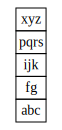

In [107]:
display(slstack.get_digraph_stack())

In [108]:
print(slstack.pop())
print(slstack.pop())
print(slstack.pop())

xyz
pqrs
ijk


In [109]:
slstack.print_stack()

fg
abc


In [110]:
slstack.print_storage()

top -> fg -> abc -> None


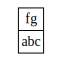

In [111]:
display(slstack.get_digraph_stack())

### Contoh sederhana: *reverse* suatu *string*, *list*, atau *array*

In [ ]:
def reverse_array_arraystack(array):
    arraystack = ArrayStack(array.dtype, len(array))
    for i in range(len(array)):
        arraystack.push(array[i])
    for i in range(len(array)):
        array[i] = arraystack.pop()

In [ ]:
def reverse_array_slstack(array):
    slstack = SLStack()
    for i in range(len(array)):
        slstack.push(array[i])
    for i in range(len(array)):
        array[i] = slstack.pop()

## Notasi *prefix*, *infix*, dan *postfix*

Notasi *prefix*, *infix*, dan *postfix* adalah tiga jenis notasi (cara penulisan) untuk menuliskan operasi aritmetika seperti penjumlahan, perkalian, dan sebagainya.

Misalnya, kita bisa menuliskan penjumlahan `3 + 5`, di mana dua angka, 3 dan 5, dioperasikan oleh suatu "operator" yaitu + (plus). Perhatikan bahwa operator berada di tengah, di antara kedua angka. Penulisan seperti ini disebut notasi *infix*, dan inilah penulisan yang biasa kita kenal.

Ada juga cara penulisan di mana operator ditempatkan sebelum kedua angka, disebut notasi *prefix*, seperti berikut: `+ 3 5`

Walaupun terlihat agak aneh, kita bisa saja mendefinisikan fungsi seperti *pseuducode* berikut:

```default
function add(x, y)
    return x+y
endfunction
```

Kemudian penggunaannya adalah `add(3, 5)`, secara tidak langsung menggunakan notasi *prefix* :)

Selain *prefix* untuk di awal dan *infix* untuk di tengah, kita juga bisa menempatkan operator setelah kedua angka, disebut notasi *postfix*. Contohnya: `3 5 +`

Notasi *postfix* sebenarnya tidak terlalu asing, karena misalnya untuk menuliskan faktorial itu biasanya menggunakan tanda seru **setelah** angkanya, lagi-lagi secara tidak langsung menggunakan notasi *postfix*, seperti: `4!`

Salah satu keuntungan menggunakan notasi *prefix* maupun *postfix* adalah bisa menghilangkan kurung tanpa menyebabkan ambigu. Contohnya, dalam notasi *infix* kita bisa menuliskan `5 * (6 + 7)` agar penjumlahan dilakukan terlebih dahulu. Sedangkan, notasi *prefix* maupun *postfix* dijamin tidak membutuhkan kurung:

* *Prefix*: `* 5 + 6 7`
* *Postfix*: `6 7 + 5 *`

*Stack* bisa sangat membantu untuk mengubah antara notasi *prefix*, *infix*, dan *postfix*.

### Tokenisasi

Sebelum membahas konversi antara notasi *prefix*, *infix*, dan *postfix*, kita perlu membahas sebentar mengenai "tokenisasi" (*tokenization*), yaitu proses "memecah" suatu string yang utuh menjadi "bagian-bagiannya".

Misalnya, kalau kita punya notasi *infix* dalam *string* `"3 + 5"`, kita bisa melakukan *tokenization* untuk memecahnya menjadi `["3", "+", "5"]`.

Cara mudah untuk melakukan tokenisasi, bisa dengan sekedar menganggap tiap "bagian" atau tiap "token" terpisahkan oleh spasi, sehingga bisa di-*split* begitu saja:

In [1]:
def tokenize(string_utuh):
    hasil = string_utuh.split(" ") # string berisi satu spasi
    return hasil

In [2]:
print(tokenize("3 + 5"))

['3', '+', '5']


Agar cara mudah ini berhasil (terutama untuk notasi *infix*), bahkan antara kurung buka/tutup juga harus diberi spasi, ya!

In [4]:
print(tokenize("5 * ( 6 + 7 )"))

['5', '*', '(', '6', '+', '7', ')']


### *Precedence* dan *associativity*

Sebelumnya, telah disebutkan bahwa salah satu keuntungan notasi *prefix* maupun *postfix* dibandingkan notasi *infix* adalah penulisan yang tidak ambigu tanpa diperlukannya kurung. Agar bisa mengubah notasi *infix* menjadi notasi *prefix* ataupun notasi *postfix*, tentunya kita harus bisa membaca notasi *infix* secara tidak ambigu. Artinya, kita harus kenal dengan aturan **urutan pengoperasian**.

Urusan urutan pengoperasian terbagi menjadi dua:

* *Precedence*, semacam tingkatan prioritas antara operasi yang berbeda, yang mana yang dilakukan duluan (apalagi kalau tidak ada tanda kurung)
* *Associativity*, urutan pengoperasian antara dua operasi yang *precedence* nya sama, apakah dari kiri ke kanan atau kanan ke kiri

Misalkan ada penulisan notasi *infix*: `9 + 8 * 7`

Tentunya perkalian dilakukan terlebih dahulu, barulah penjumlahan. Artinya, perkalian memiliki ***higher precedence*** (atau *precedence* yang lebih tinggi) daripada penjumlahan; bisa juga dikatakan, penjumlahan memiliki ***lower precedence*** (atau *precedence* yang lebih rendah) daripada perkalian.

Sedangkan, misal ada penulisan notasi *infix*: `8 / 4 * 2` dan `8 * 4 / 2`

Keduanya dilakukan dari kiri ke kanan. Artinya:

* Tidak ada prioritas yang lebih utama antara pembagian maupun perkalian, sehingga keduanya memiliki ***equal precedence*** (atau *precedence* yang sama).
* *Associativity* dari pembagian maupun perkalian bersifat *left-to-right*.

*Precedence* dan *associativity* dari beberapa operator bisa didata:

|*Precedence*|Operator|*Associativity*|
|:----------:|:------:|:-------------:|
|3|`^`|*right-to-left*|
|2|`*` `/`|*left-to-right*|
|1|`+` `-`|*left-to-right*|

Perhatikan:

* Perpangkatan bersifat *right-to-left* karena $a^{b^c} = a^{\left(b^c\right)}$.
* Pembagian maupun pengurangan bersifat *left-to-right* karena

    $a/b/c = \left(a/b\right)/c$ dan

    $a-b-c = (a-b)-c$.

* Kebetulan, perkalian maupun penjumlahan memiliki sifat asosiatif, yaitu

    $(a*b)*c = a*(b*c)$

    $(a+b)+c = a+(b+c)$

    sehingga perkalian maupun penjumlahan sebenarnya bersifat *left-to-right* maupun *right-to-left* sekaligus, yaitu
    
    $a*b*c = (a*b)*c = a*(b*c)$

    $a+b+c = (a+b)+c = a+(b+c)$

    Namun, untuk mempermudah klasifikasi, kita bisa mengkategorikan perkalian dan penjumlahan bersifat *left-to-right*.

## Urusan notasi *prefix*, *infix*, dan *postfix* dengan *stack*

### Notasi *infix* menjadi *postfix*

Setelah tokenisasi, berikut langkah mengubah notasi *infix* menjadi *postfix*.

Siapkan suatu *stack* kosong, serta tempat (misal *string* kosong) untuk menyimpan hasil infix. Lalu, *scanning* (melihat satu-per-satu) tiap token dari kiri ke kanan, dan ikuti ketentuan berikut:

1. Apabila token adalah operand/angka, langsung tambahkan ke hasil infix
2. Apabila *stack* kosong, atau apabila elemen teratas pada *stack* adalah kurung kiri, maka push token tersebut ke dalam *stack*
3. Apabila token adalah kurung kiri yaitu "(", push ke dalam *stack*
4. Apabila token adalah kurung kanan yaitu ")", lakukan while loop: lakukan pop pada stack, masukkan hasil pop tersebut ke hasil infix, hentikan while loop apabila hasil pop tersebut adalah kurung kiri.
5. Apabila token memiliki *precedence* yang lebih tinggi daripada elemen teratas pada *stack*, maka push token tersebut ke dalam *stack*.
6. Apabila token memiliki *precedence* yang lebih rendah daripada elemen teratas pada *stack*, lakukan langkah berikut: lakukan pop pada stack, lalu masukkan hasil pop tersebut ke hasil infix.
7. Apabila token memiliki *precedence* yang setara dengan elemen teratas pada *stack*, perhatikan *associativity* dari operator tersebut, lalu:

    a. Apabila untuk operator tersebut bersifat left-to-right: lakukan pop pada stack, masukkan hasil pop ke hasil infix, lalu push token
    
    b. Sedangkan apabila bersifat right-to-left: push token tersebut ke dalam stack

Setelah suatu token teratasi, tentunya langsung lanjut melihat token berikutnya. Apabila semua token sudah teratasi sedangkan stack belum kosong, maka ulangi sampai stack kosong: lakukan pop, masukkan hasil pop ke hasil infix.

### Notasi *infix* menjadi *prefix*

### Evaluasi notasi *prefix*

### Evaluasi notasi *postfix*

### Notasi *postfix* menjadi *infix*

### Notasi *prefix* menjadi *infix*